<a href="https://colab.research.google.com/github/LegendaryK469/Project2/blob/main/Long_or_Short_Ethereum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import yfinance as yf
import numpy as np

In [26]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [74]:
df = yf.download('ETH-USD',start='2020-01-01')

[*********************100%***********************]  1 of 1 completed


In [75]:
df['returns'] = np.log(df.Close.pct_change() + 1)

In [76]:
df['direction'] = [1 if i > 0 else -1 for i in df.returns]

In [77]:
def lagit(df, lags):
  names = []
  for i in range(1,lags + 1):
    df['Lag_'+str(i)] = df['returns'].shift(i)
    df['Lag_'+str(i)+'_dir'] = [1 if j > 0 else -1 for j in df['Lag_'+str(i)]]
    names.append('Lag_'+str(i))
  return names

In [78]:
dirnames = lagit(df, 2)

In [79]:
df.dropna(inplace=True)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()

In [82]:
model.fit(df[dirnames], df['direction'])

LogisticRegression()

In [83]:
df['prediction_Logit'] = model.predict(df[dirnames])

In [84]:
df['prediction_Logit']

Date
2020-01-04    1
2020-01-05    1
2020-01-06    1
2020-01-07    1
2020-01-08    1
             ..
2022-07-03    1
2022-07-04    1
2022-07-05    1
2022-07-06    1
2022-07-07    1
Name: prediction_Logit, Length: 916, dtype: int64

In [85]:
df['strat_Logit'] = df['prediction_Logit'] * df['returns']

In [86]:
np.exp(df[['returns', 'strat_Logit']].sum())

returns         9.221686
strat_Logit    11.952981
dtype: float64

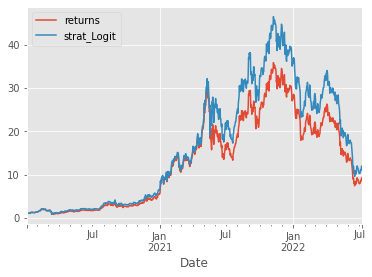

In [87]:
np.exp(df[['returns', 'strat_Logit']].cumsum()).plot()

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
train, test = train_test_split(df, shuffle=False, test_size=0.25, random_state=0)

In [90]:
train = train.copy()

In [91]:
test = test.copy()

In [92]:
model = LogisticRegression()

In [93]:
model.fit(train[dirnames], train['direction'])

LogisticRegression()

In [94]:
test['prediction_Logit'] = model.predict(test[dirnames])

In [95]:
test['strat_Logit'] = test['prediction_Logit'] * test['returns']

In [96]:
np.exp(test[['returns', 'strat_Logit']].sum())

returns        0.280569
strat_Logit    0.280569
dtype: float64

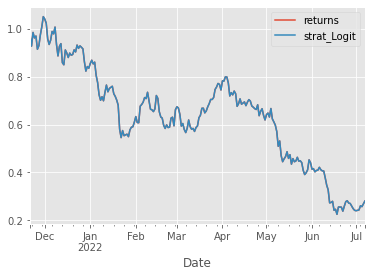

In [97]:
np.exp(test[['returns', 'strat_Logit']].cumsum()).plot()

In [98]:
from sklearn import metrics

In [99]:
metrics.confusion_matrix(test['direction'], test['prediction_Logit'])

array([[  0, 119],
       [  0, 110]])

In [100]:
print(metrics.classification_report(test['direction'], test['prediction_Logit']))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       119
           1       0.48      1.00      0.65       110

    accuracy                           0.48       229
   macro avg       0.24      0.50      0.32       229
weighted avg       0.23      0.48      0.31       229



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Prediction shows that it is wise to go long on Ethereum.  the +1 shows prediction that ETH will rise.